# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<div class="span5 alert alert-success">
<h2>SOLUTION: Is the distribution of body temperatures normal?</h2>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

(0, 40)

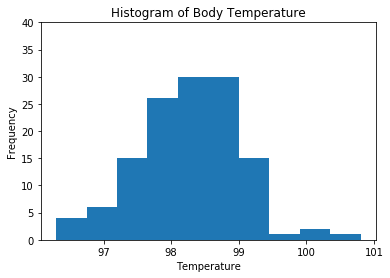

In [2]:
# First, a histogram
%matplotlib inline
plt.hist(df['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Body Temperature')
plt.ylim(0, 40)  # Add some buffer space at the top so the bar doesn't get cut off.

# Next, a quantile plot

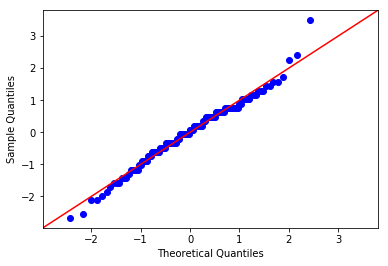

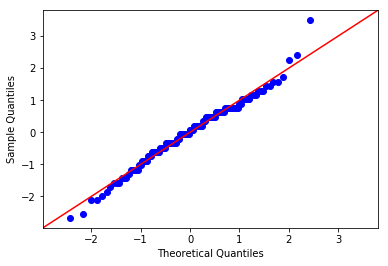

In [4]:
import statsmodels.api as sm
import numpy as np

mean = np.mean(df['temperature'])
sd = np.std(df['temperature'])
z = (df['temperature'] - mean) / sd
sm.qqplot(z, line='45')

# Finally, a normal distribution test

**WARNING: Not recommended!! Use only when you're not sure.**

In [6]:
import scipy.stats as stats

stats.mstats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

<div class="span5 alert alert-success">
<h4>SOLUTION</h4>

<p>The histogram looks *very roughly* normally distributed. There is an implied bell shape, though there are some values above the mode that occur much less frequently than we would expect under a normal distribution. The shape is not so deviant as to call it some other distribution. </p>

<p>A quantile plot can help. The quantile plot computes percentiles for our data and also the percentiles for a normal distribution via sampling (mean 0, sd 1). If the quantiles/percentiles for both distributions match, we expect to see a more or less straight line of data points. Note that the quantile plot does pretty much follow a straight line, so this helps us conclude that the distribution is likely normal. Note that there are three outliers on the "high" end and two on the "low" end that cause deviations in the tail, but this is pretty typical.</p>

<p>Suppose we really aren't sure, or the plots tell us two different conclusions. We could confirm with a statistical significance test, though this should not be your first method of attack. The p-value from the normality test is 0.25 which is significantly above the usual cutoff of 0.05. The null hypothesis is that the distribution is normal. Since we fail to reject the null hypothesis, we conclude that the distribution is probably normal.</p>
</div>

<div class="span5 alert alert-success">
<h2>SOLUTION: Is the sample size large? Are the observations independent?</h2>
</div>

In [7]:
n = len(df['temperature'])
n

130

<div class="span5 alert alert-success">
<p>The sample size is 130. Literature typically suggests a lower limit of 30 observations in a sample for CLT to hold. In terms of CLT, the sample is large enough.</p>

<p>We must assume that the obserations are independent. One person's body temperature should not have any affect on another person's body temperature, so under common sense conditions, the observations are independent. Note that this condition may potentially be violated if the researcher lacked common sense and performed this study by stuffing all of the participants shoulder to shoulder in a very hot and confined room. </p>

<p>Note that the temperatures <i>may</i> be dependent on age, gender, or health status, but this is a separate issue and does not affect our conclusion that <i>another person's</i> temperature does not affect someone else's temperature.</p>
</div>

<div class="span5 alert alert-success">
<h2>SOLUTION: Is the true population mean really 98.6 degrees F?</h2>

<p>We are testing only if the true population mean temperature is 98.6. We are treating everyone as being in the same group, with one mean. We use a **one-sample** test. The population standard deviation is not given, so we assume it is not known. We do however know the sample standard deviation from the data and we know that the sample size is large enough for CLT to apply, so we can use a $z$-test.</p>
</div>

In [ ]:
z = (mean - 98.6)/(sd / np.sqrt(n))
z

<div class="span5 alert alert-success">
Since the question does not ask if the true mean is greater than, or less than 98.6 as the alternative hypothesis, we use a two-tailed test. We have to regions where we reject the null hypothesis: if $z < -1.96$ or if $z > 1.96$, assuming $\alpha = 0.05$. Since -5.48 < -1.96, we reject the null hypothesis: the true population mean temperature is NOT 98.6.

<p>We can also use a p-value:</p>
</div>

In [ ]:
stats.norm.cdf(z) * 2
# NOTE: Since CDF gives us $P(Z \le z)$ and this is a two-tailed test, we multiply the result by 2

<div class="span5 alert alert-success">
<p>Since the p-value is *way* below 0.05, we reject the null hypothesis. The population mean is not 98.6.</p>

<p>The $z$-test was the "correct" test to use in this case. But what if we used a $t$-test instead? The degrees of freedom is $n - 1 = 129$.</p>
</div>

In [ ]:
t = (mean - 98.6)/(sd / np.sqrt(n))

<div class="span5 alert alert-success">
We find the critical value of $t$ and when $\vert t \vert > \vert t^* \vert$ we reject the null hypothesis.
</div>

In [ ]:
t_critical = stats.t.ppf(0.05 / 2, n - 1)
t_critical

<div class="span5 alert alert-success">
<p>Note that the critical value of $t$ is $\pm 1.979$. This is pretty close to the $\pm 1.96$ we used for the $z$-test. *As the sample size gets larger, the student's $t$ distribution converges to the normal distribution.* So in theory, even if your sample size is large you could use the $t$-test, but the pesky degrees of freedom step is likely why people do not. If we use a sample of size, say, 1000, the critical values are close to identical.</p>

<p>So, to answer the question, the result is NOT different! The only case where it would be different is if the $t$ statistic were between -1.96 and -1.979 which would be pretty rare.</p>

<div class="span5 alert alert-success">
<h2>SOLUTION: At what temperature should we consider someone's temperature to be "abnormal"?</h2>

<p>We compute the confidence interval using $z^* = \pm 1.96$.</p>

<p>The margin of error is </p>

$$MOE = z^* \frac{\sigma}{\sqrt{n}}$$
</div>

In [ ]:
sd = df['temperature'].std()
n = len(df['temperature'])
moe = 1.96 * sd / np.sqrt(n)
moe

In [ ]:
mean = df['temperature'].mean()
ci = mean + np.array([-1, 1]) * moe
ci

<div class="span5 alert alert-success">At 95% confidence level, we consider a temperature abnormal if it is below 98.1 degrees or above 98.38 degrees. Since the null hypothesis 98.6 is not in the confidence interval, we reject the null hypothesis -- the true population mean is not 98.6 degrees.</div>

<div class="span5 alert alert-success">

<h2>SOLUTION: Is there a significant difference between males and females in normal temperature?</h2>

<p>We use a two-sample test. Since the number of males is greater than 30 and the number of females is greater than 30, we use a two-sample z-test. Since the question just asks if there is a *difference* and doesn't specify a direction, we use a two-tailed test.</p>

$$z = \frac{(\bar{x}_M - \bar{x}_F) - 0}{\sqrt{\frac{\sigma_M^2}{n_M} + \frac{\sigma_F^2}{n_F}}}$$

In [ ]:
males = df.gender == 'M'
diff_means = df.temperature[males].mean() - df.temperature[~males].mean()
sd_male = df.temperature[males].std()
sd_female = df.temperature[~males].std()
n_male = np.sum(males)
n_female = len(df.temperature) - n_male

z = diff_means / np.sqrt(((sd_male ** 2)/ n_male) + ((sd_female ** 2)/ n_female))
z

In [ ]:
pval = stats.norm.cdf(z) * 2
pval

<div class="span5 alert alert-success">
<p>Since the p-value of 0.022 < 0.05, we reject the null hypothesis that the mean body temperature for men and women is the same. The difference in mean body temperature between men and women is statistically significant.</p>
</p>

In [ ]:
diff_means + np.array([-1, 1]) * 1.96 * np.sqrt(((sd_male ** 2)/ n_male) + ((sd_female ** 2)/ n_female))

<div class="span5 alert alert-success">Since the null hypothesized 0 is not in the confidence interval, we reject the null hypothesis with the same conclusion as the hypothesis test.</div>